In [6]:
from PIL import Image
path = 'dataset/1.jpg'
original_image = Image.open(path)

In [7]:
from lib.pipeline import Pipeline
from lib.stages import GrayScaleStage, RotateStage, CropStage, FFTStage, CartToPolStage


NC, NL = 575, 575
rotated_degree = 32
rotated_image_pipeline = Pipeline([
  GrayScaleStage(),
  RotateStage(rotated_degree),
  CropStage(NC, NL),
])

original_image_pipeline = Pipeline([
  GrayScaleStage(),
  CropStage(NC, NL),
])

rotated_image = rotated_image_pipeline.execute(original_image)
original_image = original_image_pipeline.execute(original_image)

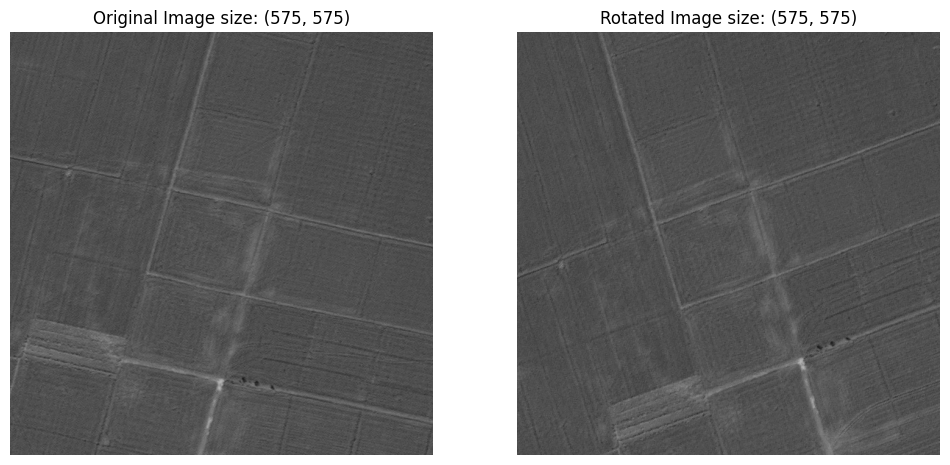

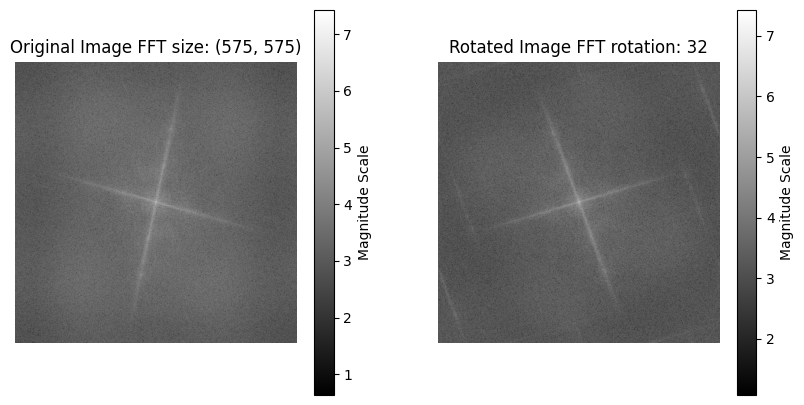

In [8]:
from lib.utils import plot_images, plot_images_spectrum

fft_pipeline = Pipeline([
  FFTStage(),
])

f1 = fft_pipeline.execute(original_image)
f2 = fft_pipeline.execute(rotated_image)

plot_images([original_image, rotated_image], [f"Original Image size: {original_image.size}", f"Rotated Image size: {rotated_image.size}"])
plot_images_spectrum([f1, f2], [f"Original Image FFT size: {f1.shape}", f"Rotated Image FFT rotation: {rotated_degree}"])

(286, 180)
(286, 180)
(286, 1800)
(286, 1800)


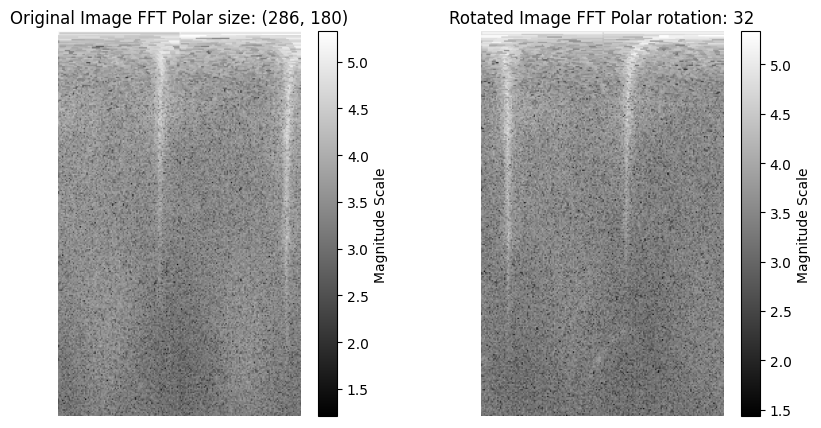

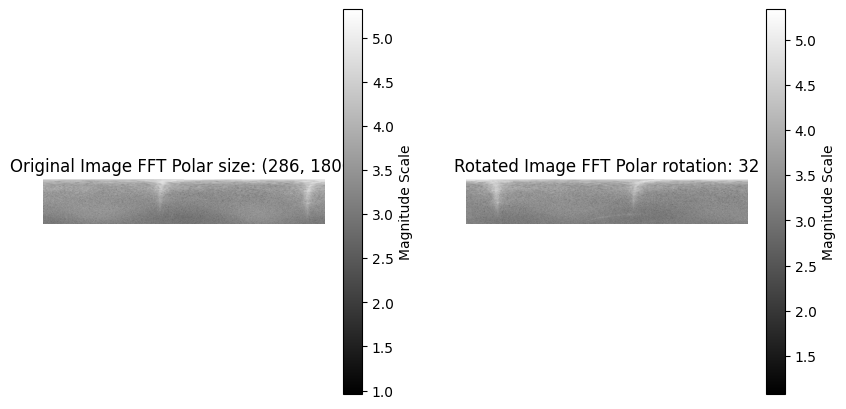

In [9]:
cart_to_polar_pipeline = Pipeline([
  CartToPolStage(),
])

cart_to_polar_pipeline_d = Pipeline([
  CartToPolStage(dtheta=0.1),
])
polar_f1 = cart_to_polar_pipeline.execute(f1)
polar_f2 = cart_to_polar_pipeline.execute(f2)
polar_f3 = cart_to_polar_pipeline_d.execute(f1)
polar_f4 = cart_to_polar_pipeline_d.execute(f2)
plot_images_spectrum([polar_f1, polar_f2], [f"Original Image FFT Polar size: {polar_f1.shape}", f"Rotated Image FFT Polar rotation: {rotated_degree}"])
plot_images_spectrum([polar_f3, polar_f4], [f"Original Image FFT Polar size: {polar_f3.shape}", f"Rotated Image FFT Polar rotation: {rotated_degree}"])

In [10]:
from lib.comparator import Comparator

rho, theta = Comparator(polar_f1, polar_f2).compare()

print(rho, theta)

print(f'Ângulo estimado: {theta * 1}')
print(f"Ângulo esperado: {rotated_degree}")

1 32
Ângulo estimado: 32
Ângulo esperado: 32
